## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Data collection & preprocessing

In [2]:
data=pd.read_csv("Rainfall.csv")

In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


In [8]:
data.columns = data.columns.str.strip() 

In [9]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [10]:
data= data.drop(columns=["day"])

In [11]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [12]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [13]:
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])

In [14]:
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())

In [15]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [16]:
data["rainfall"]=data["rainfall"].map({"yes":1,"no":0})

In [17]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


## EDA

In [18]:
data.shape

(366, 11)

In [19]:
sns.set(style="whitegrid")

In [20]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [21]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

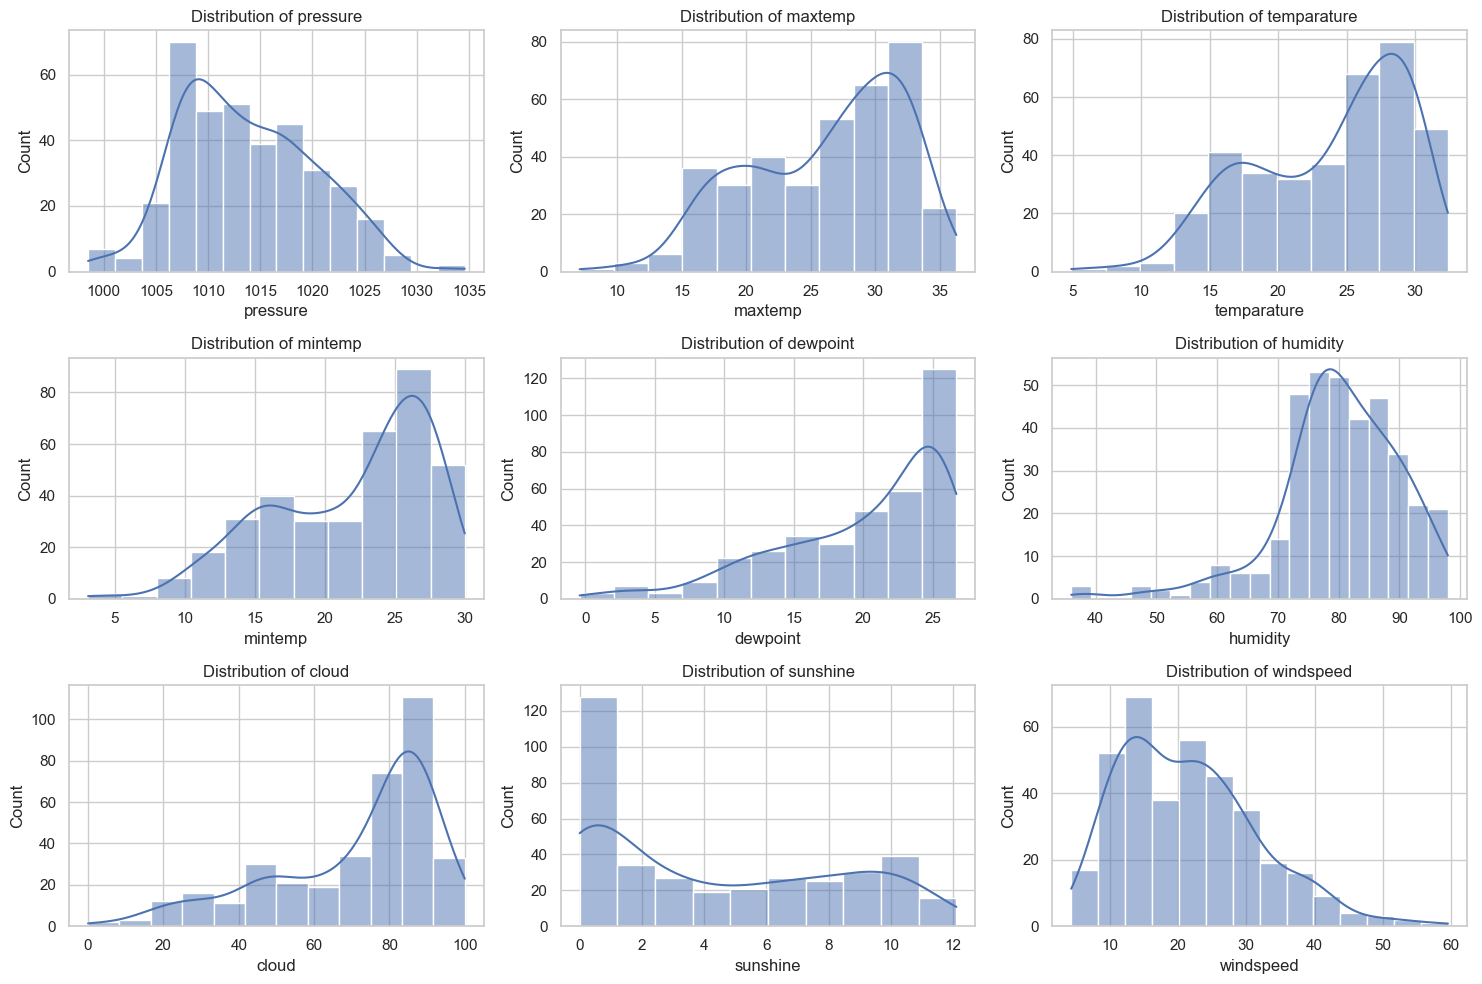

In [22]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

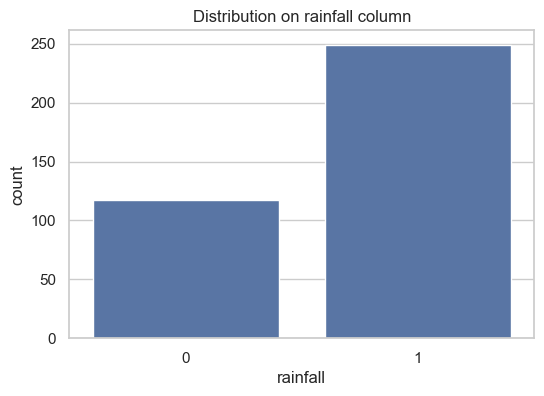

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("Distribution on rainfall column")
plt.show()

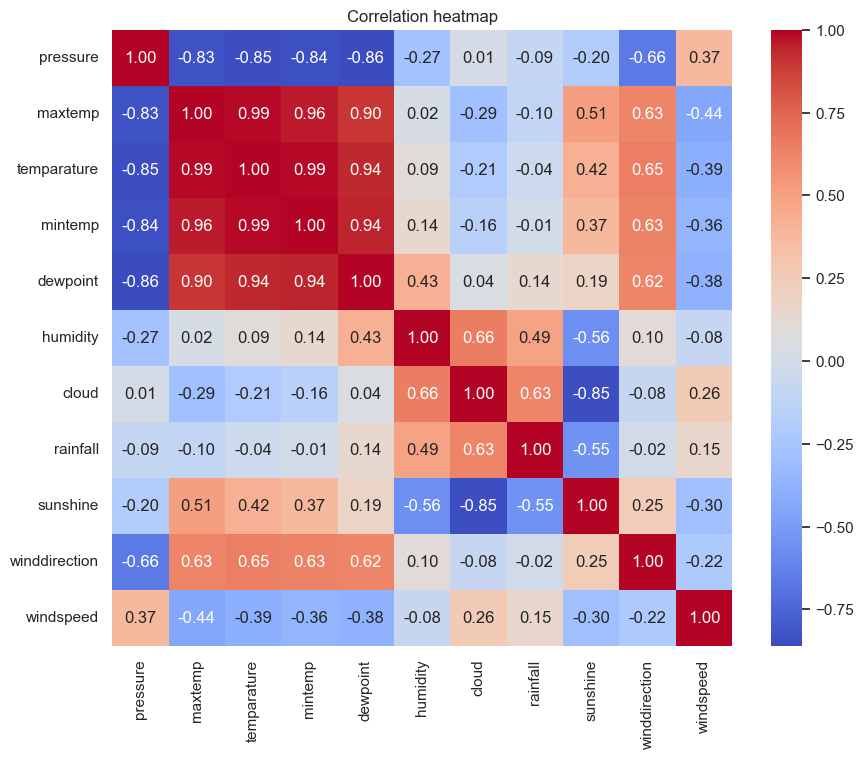

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

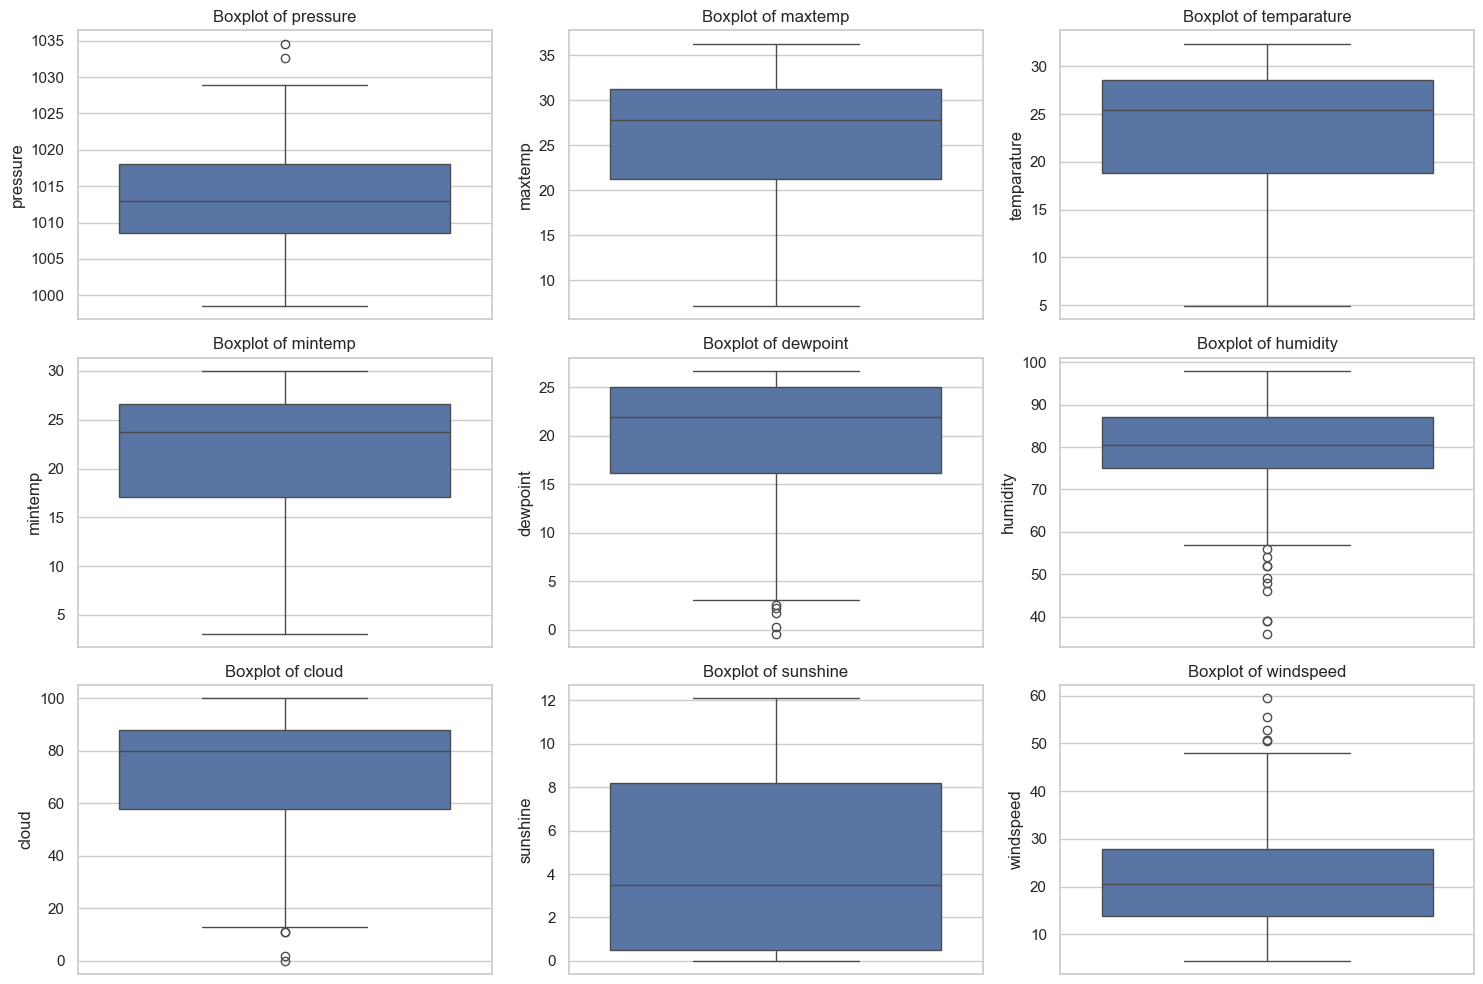

In [25]:
 plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [26]:
# for any outliers we can check and count them and get them replaced by median but not mean
# because mean is affected by outliers

In [27]:
data =data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [28]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


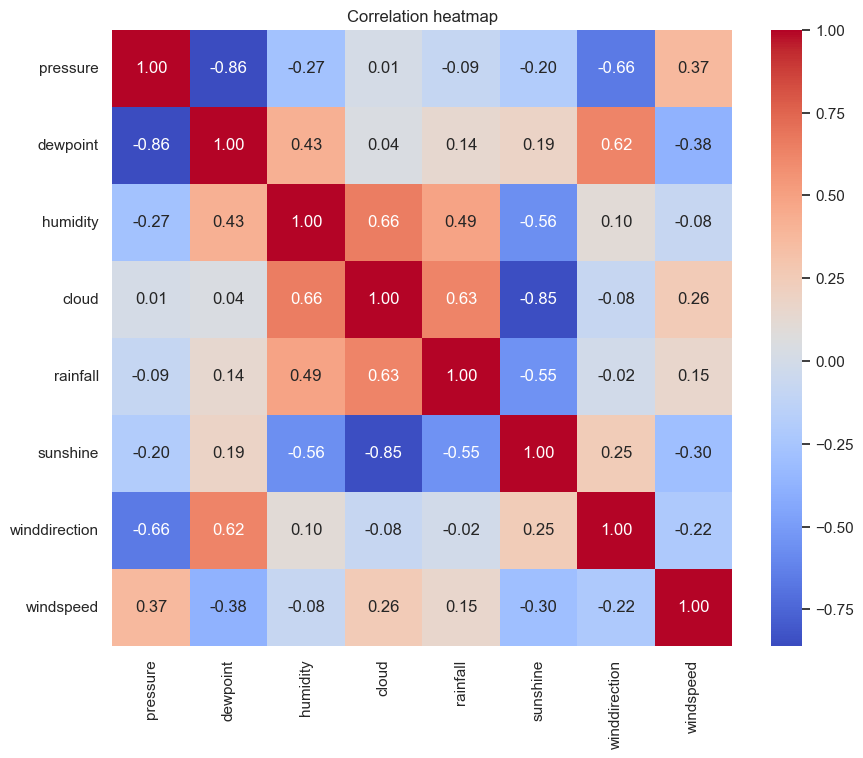

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [30]:
# performing downsampling to have equal no. of outputs (ie. 1 & 0 outputs)

In [31]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [32]:
df_major=data[data["rainfall"] == 1]
df_minor=data[data["rainfall"] == 0]

In [33]:
df_major.shape

(249, 8)

In [34]:
df_major_ds=resample(df_major,replace=False,n_samples=len(df_minor),random_state=42)

In [35]:
df_major_ds.shape

(117, 8)

In [36]:
df_minor.shape

(117, 8)

In [37]:
dfds=pd.concat([df_major_ds,df_minor])

In [38]:
dfds.shape

(234, 8)

In [39]:
# shuffling final df (dfds)
dfds=dfds.sample(frac=1,random_state=42).reset_index(drop=True)

In [40]:
dfds.shape

(234, 8)

In [41]:
dfds.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [42]:
dfds["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

## Train test split

In [43]:
X=dfds.drop(columns=["rainfall"])
y=dfds["rainfall"]

In [44]:
X

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,0.0,30.0,28.5
1,1013.4,19.5,69,17,10.5,70.0,12.4
2,1006.1,24.4,74,27,10.8,220.0,8.7
3,1007.6,24.8,85,84,1.8,70.0,34.8
4,1021.2,8.4,66,18,10.1,20.0,24.4
...,...,...,...,...,...,...,...
229,1008.1,25.4,86,75,5.7,20.0,9.5
230,1010.1,19.9,91,89,0.0,70.0,31.8
231,1020.6,14.7,91,88,0.3,50.0,24.4
232,1008.3,24.1,74,29,5.7,10.0,4.4


In [45]:
y

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

## Hyperparameter tuning using GridSearch CV

In [47]:
rf_model= RandomForestClassifier(random_state=42)

params={
    "n_estimators":[50,100,200,300,500],
    "max_features": ["swrt","log2"],
    "max_depth" : [None,5,10,20,30],
    "min_samples_split": [2,5,8,10],
    "min_samples_leaf" : [1,2,4]
}

In [48]:
grid_search_rf= GridSearchCV(estimator=rf_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1500 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['swrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [50, 100, 200, 300, 500]},
             verbose=2)

In [49]:
bestmodel= grid_search_rf.best_estimator_
print("Best parameters for RF: ", grid_search_rf.best_params_)

Best parameters for RF:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}


## Model Evaluation

In [50]:
cv_scores= cross_val_score(bestmodel,X_train,y_train,cv=5)
print("CV scores: ",cv_scores)
print("Mean cv score: ",np.mean(cv_scores))

CV scores:  [0.71052632 0.81578947 0.83783784 0.86486486 0.91891892]
Mean cv score:  0.8295874822190612


In [51]:
# Scores on test data

y_pred= bestmodel.predict(X_test)
print("Test set accuracy: ", accuracy_score(y_test,y_pred))
print("Test set Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test,y_pred))

Test set accuracy:  0.723404255319149
Test set Confusion Matrix: 
 [[16  8]
 [ 5 18]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.69      0.78      0.73        23

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47

